# Week 5 - Logistic Regression and Classification Error Metrics

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

Alternatively the same data set can be found at https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/downloads/human-activity-recognition-with-smartphones.zip
The train file can be renamed as Human_Activity_Recognition_Using_Smartphones_Data.csv 

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [1]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [2]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

In [3]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [4]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [5]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [6]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [7]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

4983    0
9862    3
4761    1
8172    0
9072    2
Name: Activity, dtype: int64

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [9]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

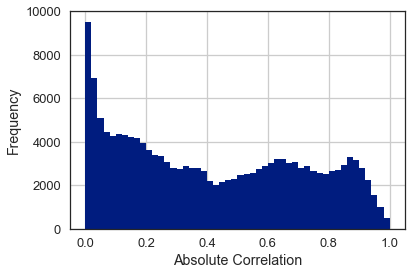

In [11]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [12]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
92472,tBodyAccMag-std(),tGravityAccMag-std(),1.000000,1.000000
156049,fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-sma(),1.000000,1.000000
95316,tBodyAccMag-arCoeff()1,tGravityAccMag-arCoeff()1,1.000000,1.000000
93189,tBodyAccMag-max(),tGravityAccMag-max(),1.000000,1.000000
95667,tBodyAccMag-arCoeff()2,tGravityAccMag-arCoeff()2,1.000000,1.000000


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [14]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [15]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the [documentation](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [16]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression().fit(X_train, y_train)

In [17]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [18]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train, y_train)

In [ ]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations
# Note: The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
solver_penalty_dict = {‘newton-cg’: 'l2', 
                       ‘lbfgs’: 'l2', 
                       ‘sag’: 'l2', 
                       ‘saga’: 'l1'}
model_dict = {}
for solver_label, penalty_label in solver_penalty_dict.items():
    key = 'lr_' + solver_label + '_' + penalty_label
    model_dict[key] = LogisticRegressionCV(Cs=10, cv=4, penalty=penalty_label, solver=_solver_label, 
                                           multi_class='multinomial').fit(X_train, y_train)

## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [19]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

# Note: pandas.MultiIndex.labels has been renamed to pandas.MultiIndex.codes - Changed in version 0.24.0: 
for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 labels=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
35   0.120025  0.521152 -0.471850  0.031754 -0.183172  0.303932  0.000000   
312 -0.004803  0.120696  0.191586 -0.189583  0.368461  0.029611  0.000000   
419 -0.001539  0.197548  0.234874  0.237327  0.122820  0.064808  0.000000   
152 -0.173063 -0.142732  0.325227  0.174732  0.325345 -0.825249  0.000000   
317 -0.024262  0.070896 -0.009851  0.464239  0.142857 -0.669523  0.000000   
78   0.125709 -0.057108 -0.000535  0.123440 -0.340250  0.224885  0.000000   
377 -0.077703  0.370909 -0.381862  0.586208 -0.407837 -0.357296  0.000000   
130 -0.021087 -0.175922  0.302891  0.648494 -0.439222 -0.358331  0.000000   
150  0.039886  0.678780 -0.584048  0.252939 -0.248377 -0.122703  0.000000   
83  -0.065386 -0.265735 -0.244503  0.136766 -0.123872  0.106337 -0.004389   

                                                             l2            \
            1         2         3         4         5         0         1   
35   0.000000  0.000000  0.000000 -0.226682  0.991927  0.288970  0.691986   
312  0.000000  0.000000  0.000000  0.354859  0.000000 -0.033697  0.037980   
419  0.132103  0.412327  0.000000  0.106525  0.175974 -0.041139  0.132002   
152  0.000000  0.000000  0.000000  1.010534 -3.753348 -0.625263  0.078086   
317  0.000000  0.000000  0.780620  0.027873 -0.738502 -0.072816 -0.012592   
78  -0.146576  0.000000  0.071359 -0.703163  0.519146  0.475256 -0.062184   
377  0.014130  0.000000  0.765046 -0.854149 -1.242661 -0.348359  0.549036   
130  0.000000  0.000000  1.118835 -0.747049 -0.450275 -0.080921 -0.363338   
150  0.000000  0.000000  0.000000 -0.034727 -0.515340  0.257383  0.981723   
83   0.000000  0.000000  0.000000  0.000000  0.000000 -0.147898 -0.377032   

                                             
            2         3         4         5  
35  -0.694178  0.222022 -0.763805  0.742211  
312  0.135071 -0.515137  1.109602 -0.208225  
419  0.209495  0.377700  0.130475 -0.118669  
152  0.413517  0.407014  1.435442 -1.693320  
317 -0.071181  0.759400  0.541401 -1.434053  
78  -0.031962  0.187443 -0.484420  0.354230  
377 -0.586389  0.681884 -1.092627 -0.517845  
130  0.499937  1.518771 -1.503533 -1.009472  
150 -0.667609  0.549192 -0.617679 -0.184891  
83  -0.254476  0.199298 -0.472237  0.438547

Prepare six separate plots for each of the multi-class coefficients.

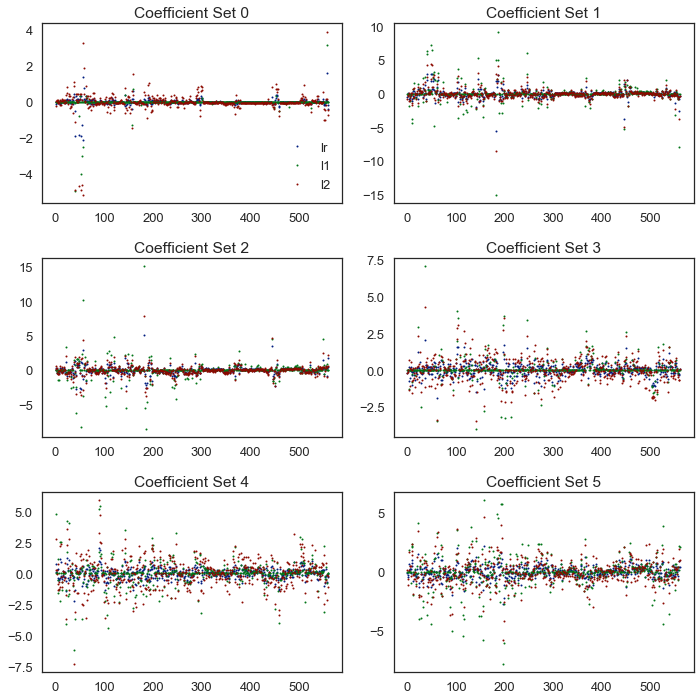

In [20]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    coef_data = coefficients.xs(loc, level=1, axis=1)
    coef_data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

## Question 6

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [21]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [22]:
y_prob.head()

,lr,l1,l2
0,0.998939,0.998917,0.999820
1,0.988165,0.999626,0.999966
2,0.987592,0.995563,0.998849
3,0.981381,0.999170,0.994541
4,0.998277,0.999922,0.999627


## Question 7

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [23]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:
    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [24]:
#Run the metrics
metrics

,lr,l1,l2
accuracy,0.984142,0.983819,0.984790
auc,0.990384,0.990148,0.990744
fscore,0.984143,0.983817,0.984789
precision,0.984144,0.983833,0.984796
recall,0.984142,0.983819,0.984790


## Question 8

Display or plot the confusion matrix for each model.

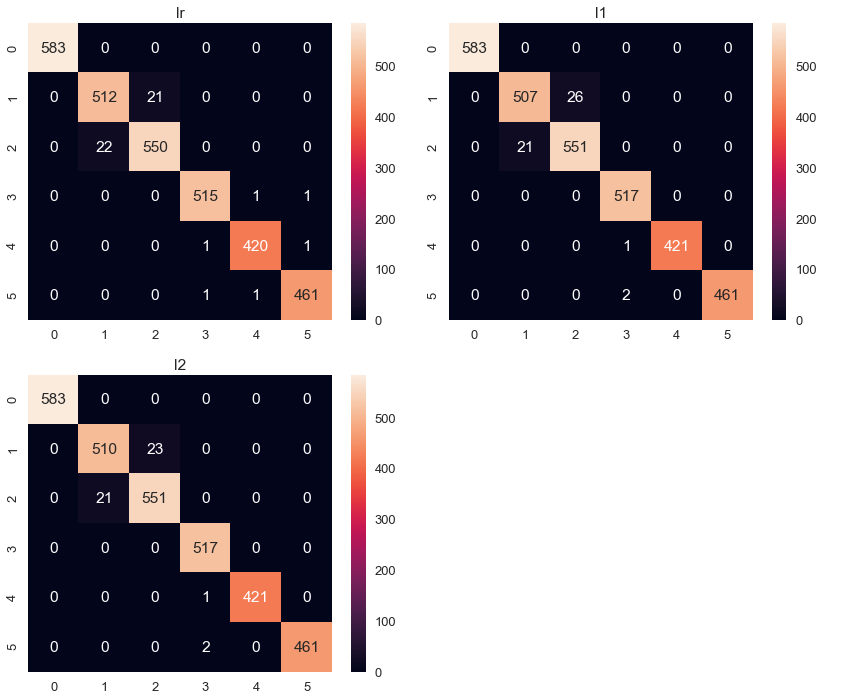

In [25]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

## Question 9
[Identify features](https://scikit-learn.org/stable/modules/feature_selection.html) with low variance and highly correlated columns and drop those columns before building models

In [26]:
from sklearn.feature_selection import VarianceThreshold
# Remove Boolean features with threshold 0.95 (i.e. which are the same value for more than 95% of the samples)
sel = VarianceThreshold(threshold=(.95 * (1 - .95)))
# X_data_new = pd.DataFrame(sel.fit_transform(X_data2))
# new_feature_cols = X_data_new.columns
# From 561 features to 371 (95% threshold), 91 (80% threshold), 50 (70% threshold)
# print(X_data_new.dtypes.value_counts())

# For a simple split into training and test sets ignoring distribution of classes
# from sklearn.model_selection import train_test_split

# X_new, X_test_new = train_test_split(data_new)
# y_new, y_test_new = train_test_split(data_y)

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# from sklearn.feature_selection import chi2
# Note: chi-squared is commonly used for categorical features (must be non-negative values). Our feature values range is [-1,1]

# To select the k best features based on using ANOVA F-value as a score function
selector = SelectKBest(score_func=f_classif, k=50)

# Returns a new dataframe after feature selection, but feature/column names have been dropped
X_data_new = pd.DataFrame(selector.fit_transform(data[feature_cols].copy(), data['Activity']))
print(X_data_new.shape, data.shape)

# from sklearn.model_selection import StratifiedShuffleSplit
# Get the split indexes
# strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)
# train_idx, test_idx = next(strat_shuf_split.split(X_data_new, data_y))

# Create the dataframes
X_train_new = X_data_new.loc[train_idx]
X_test_new = X_data_new.loc[test_idx]
y_train_new = data.loc[train_idx, 'Activity']
y_test_new = data.loc[test_idx, 'Activity']
print(X_train.shape, X_train_new.shape)

(10299, 100) (10299, 562)
(7209, 561) (7209, 100)


In [28]:
y_train_new.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [29]:
y_test_new.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

 Repeat Model building with new training data after removing higly correlated columns

In [30]:
# Try standard, L1 and L2 Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

model_dict = {}

# Standard logistic regression - default solver for LogisticRegression is 'liblinear'
model_dict['lr_new'] = LogisticRegression().fit(X_train_new, y_train_new)

In [31]:
# L1 regularized logistic regression - slow to converge, especially with cross validation
model_dict['lr_l1_new'] = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train_new, y_train_new)

In [32]:
# L2 regularized logistic regression - default solver for LogisticRegressionCV is 'lbfgs'
model_dict['lr_l2_new'] = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train_new, y_train_new)

In [ ]:
#Try with different solvers like ‘newton-cg’, ‘lbfgs’, ‘sag’, ‘saga’ and give your observations
# Note: The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
solver_penalty_dict = {‘newton-cg’: 'l2', 
                       ‘sag’: 'l2', 
                       ‘saga’: 'l1'}

for solver_label, penalty_label in solver_penalty_dict.items():
    key = 'lr_' + solver_label + '_' + penalty_label +_ '_new'
    model_dict[key] = LogisticRegressionCV(Cs=10, cv=4, penalty=penalty_label, solver=_solver_label, 
                                           multi_class='multinomial').fit(X_train_new, y_train_new)

## Question 10

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [33]:
# Combine all the coefficients into a dataframe for comparison
coefficients = list()

# Note: pandas.MultiIndex.labels has been renamed to pandas.MultiIndex.codes - Changed in version 0.24.0: 
for label, model in model_dict.items():
    coeffs = model.coef_
    coeff_label = pd.MultiIndex(levels=[[label], [0,1,2,3,4,5]], 
                                 labels=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

# Concatenate our list of dataframes into a single dataframe, joining on rows (axis=1) rather than columns
coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr_new                                                   lr_l1_new  \
           0         1         2         3         4         5         0   
90 -0.063414 -0.150719 -0.121200 -1.039624  0.381362  0.186238       0.0   
93 -0.004977  0.982518  0.669301  2.113543  0.977204 -2.460701       0.0   
75 -0.065413  0.334853 -1.747663  0.731699  1.303835  0.356363       0.0   
38  0.093922 -0.193010 -0.493810 -1.487434  0.090180  0.027052       0.0   
42 -0.047608  0.022277 -0.039429  0.178149 -0.229937 -0.666156       0.0   
61 -0.213064  0.273433  0.674165  0.254808  0.372912  0.797560       0.0   
40  0.312280  0.016103  0.133167 -0.577488  0.179892 -0.293226       0.0   
27 -0.151973  2.052029 -1.441357 -0.728988  1.730617 -0.682377       0.0   
3  -0.025610 -0.094585 -0.691276 -0.642740 -0.944033  0.322172       0.0   
13 -0.072584  0.004982  0.020638  0.439782 -0.648536 -0.286140       0.0   

                                                     lr_l2_new            \
           1         2         3         4         5         0         1   
90  0.000000  0.000000  0.000000  0.000000  0.000000 -0.087562  5.206757   
93  0.000000  0.000000  1.946251  0.000000 -4.782483 -0.026731 -6.783457   
75  0.977057 -2.278613  0.198100  1.541790  0.000000  0.028357  3.045090   
38  0.000000  0.000000 -1.139077  0.000000  0.000000  0.242226 -1.214361   
42  0.000000  0.000000  0.000000  0.000000  0.000000 -0.066183  3.762251   
61  0.207316  1.313439  0.000000  0.506113  0.489467 -0.853433 -0.573273   
40  0.000000  0.710664  0.000000  0.000000  0.000000  0.643611 -0.963833   
27  2.495549 -2.272467 -0.670871  2.643140 -1.069637 -0.620004  3.816166   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.119794  0.272757   
13  0.000000  0.000000  0.000000  0.000000  0.000000 -0.096494 -2.167780   

                                              
            2         3         4          5  
90 -10.200856 -3.241652  1.354502  11.091166  
93  12.922150  2.189171  2.547876  -2.482332  
75  -2.290007  4.353913  3.415836  -2.275934  
38   0.995470 -0.991662 -0.609239  -2.858627  
42  -6.496779 -1.700005 -1.797243  22.606627  
61   2.850161 -2.863915  0.243908   3.831033  
40   0.445817  5.071965  1.475334   2.034565  
27  -3.327350 -2.481607  4.093405  -1.724606  
3   -6.942136  0.080508  0.158487  -8.521786  
13  -1.559609  6.007605 -2.109151   6.932848

Prepare six separate plots for each of the multi-class coefficients.

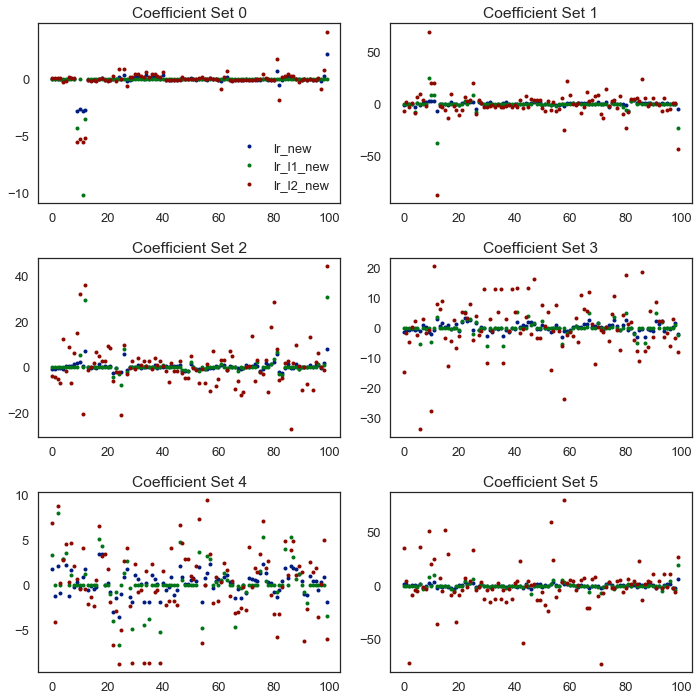

In [34]:
# try the plots
# Create a figure containing a grid of 6 axes across 3 rows and 2 columns
fig, axList = plt.subplots(nrows=3, ncols=2)
# Flatten the array of axes into a list which we can iterate over more easily
axList = axList.flatten()
fig.set_size_inches(10,10)

# enumerate(list, start=0) is an iterator producing tuples (start + i, list[i]) for i in [0, ..., len(list)-1]
for loc, ax in enumerate(axList):
    # Take a cross-section (xs) of the coefficients dataframe where the column (axis=1) label at level 1 is equal to loc
    data = coefficients.xs(loc, level=1, axis=1)
    # Plot coefficient value against feature index for each column/model in the given axes object
    data.plot(marker='o', ls='', ms=4.0, ax=ax, legend=False)
    
    # Put a legend on position 4 (lower right) on the first plot in the list of axes
    if loc == 0:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

## Question 11

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [35]:
# Predict the class and the probability for each
y_new_pred = pd.concat([pd.Series(model.predict(X_test_new), name=label) 
                    for label, model in model_dict.items()], axis=1)

y_new_prob = pd.concat([pd.Series(model.predict_proba(X_test_new).max(axis=1), name=label) 
                    for label, model in model_dict.items()], axis=1)

y_new_pred.head()

,lr_new,lr_l1_new,lr_l2_new
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [36]:
y_new_prob.head()

,lr_new,lr_l1_new,lr_l2_new
0,0.930385,0.960700,0.999979
1,0.960908,0.986584,0.998662
2,0.942572,0.982745,0.997945
3,0.528482,0.601463,0.664895
4,0.964412,0.999879,1.000000


## Question 12

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [37]:
# Calculate the error metrics as listed above
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

new_metrics = list()
new_cm = dict()

for label in model_dict.keys():
    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test_new, y_new_pred[label], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test_new, y_new_pred[label])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test_new, classes=[0,1,2,3,4,5]),
              label_binarize(y_new_pred[label], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    new_cm[label] = confusion_matrix(y_test_new, y_new_pred[label])
    
    new_metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=label))

new_metrics = pd.concat(new_metrics, axis=1)

In [38]:
#Run the metrics
new_metrics

,lr_new,lr_l1_new,lr_l2_new
accuracy,0.930097,0.942718,0.947573
auc,0.957753,0.965431,0.968321
fscore,0.929962,0.942700,0.947579
precision,0.929969,0.942718,0.947598
recall,0.930097,0.942718,0.947573


## Question 13

Display or plot the confusion matrix for each model.

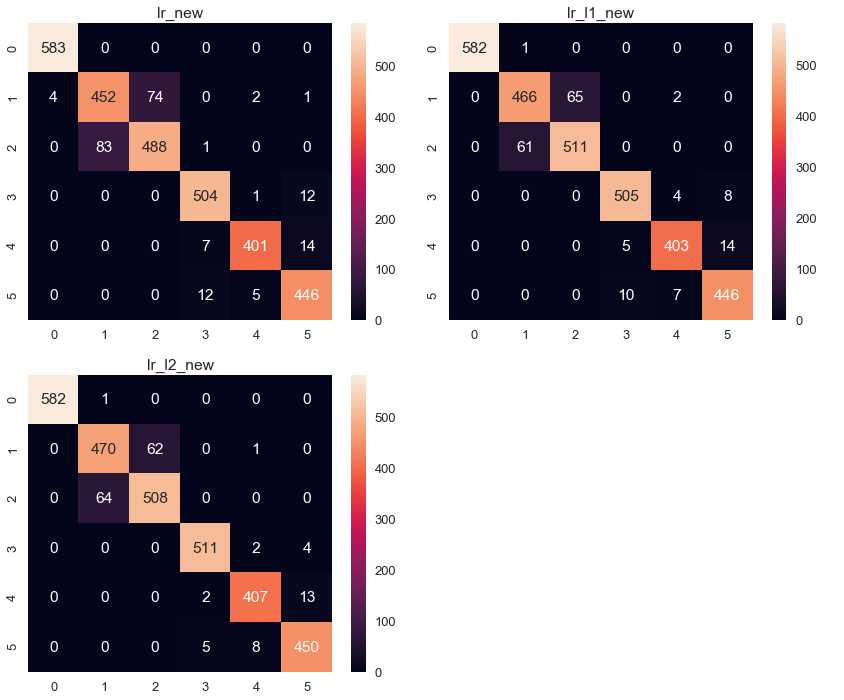

In [39]:
#plot the confusion matrix
# Create a figure containing a grid of 4 axes across 2 rows and 2 columns
fig, axList = plt.subplots(nrows=2, ncols=2)
# Flatten the array of axes into a list which we can iterate over more easily
axList = axList.flatten()
fig.set_size_inches(12, 10)
# As we are only plotting the confusion matrix for 3 models, we don't draw the last (4th) axes object
axList[-1].axis('off')

for ax, lab in zip(axList[:-1], model_dict.keys()):
    sns.heatmap(new_cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

Perform a comparison of the outputs between Question 7 and 12 and give your observation

In [40]:
# We compare the error metrics for models based on all 561 features to models after selecting only 50 features
# Ridge regression/L2 regularization seems to give the best results in both cases
# Impressive that using less than 10% of all features is still around 90% as good as using all of them 
pd.concat([metrics, new_metrics], axis=1)

,lr,l1,l2,lr_new,lr_l1_new,lr_l2_new
accuracy,0.984142,0.983819,0.984790,0.930097,0.942718,0.947573
auc,0.990384,0.990148,0.990744,0.957753,0.965431,0.968321
fscore,0.984143,0.983817,0.984789,0.929962,0.942700,0.947579
precision,0.984144,0.983833,0.984796,0.929969,0.942718,0.947598
recall,0.984142,0.983819,0.984790,0.930097,0.942718,0.947573


Perform a comparison of the outputs between Question 8 and 13 and give your observation

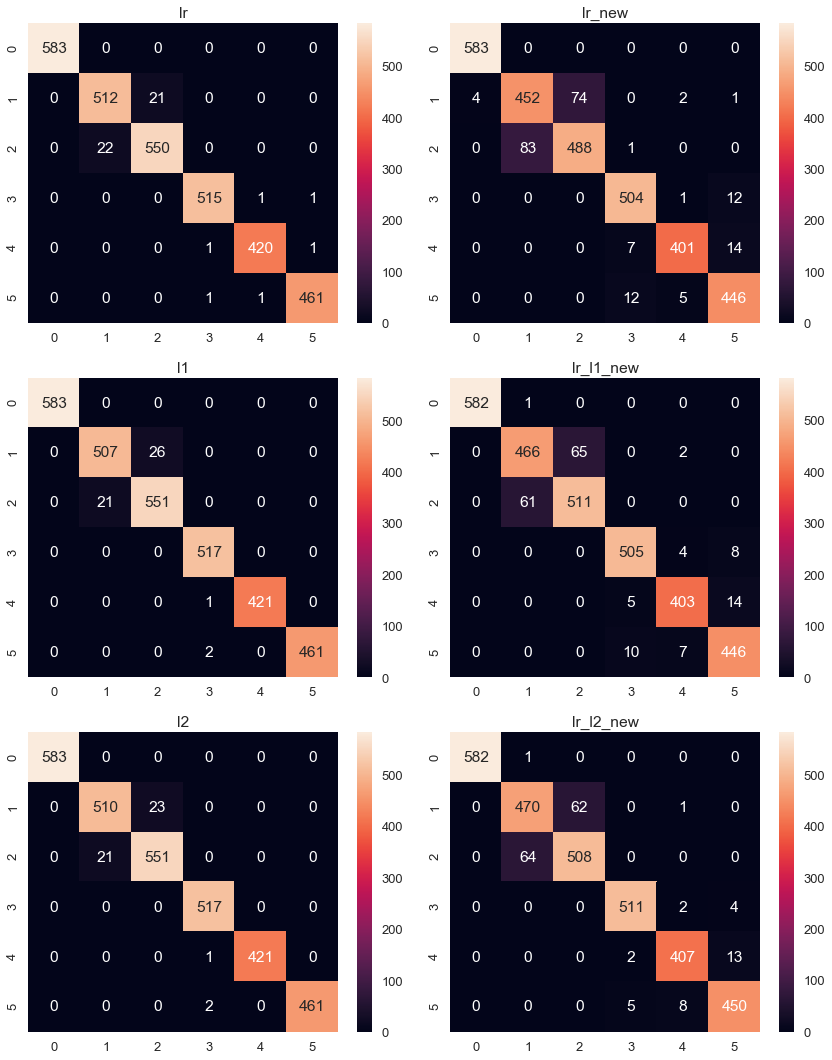

In [41]:
# We plot the confusion matrix heatmap diagrams side by side for comparison
# We can see that the smaller models still perform well, but have difficulty distinguishing between sitting and standing

# Create a figure containing a grid of 6 axes across 3 rows and 2 columns
fig, axList = plt.subplots(nrows=3, ncols=2)
# Flatten the array of axes into a list which we can iterate over more easily
# axList = axList.flatten()
fig.set_size_inches(12, 15)

for ax_row, label, new_label in zip(axList, coeff_labels, model_dict.keys()):
    # Plot the confusion matrix from the full feature model on the left
    sns.heatmap(cm[label], ax=ax_row[0], annot=True, fmt='d');
    ax_row[0].set(title=label);
    # Plot the confusion matrix from the fewer features model on the right
    sns.heatmap(new_cm[new_label], ax=ax_row[1], annot=True, fmt='d');
    ax_row[1].set(title=new_label);
    
plt.tight_layout()